# 📌 Feature Selection in Machine Learning
Feature selection is the process of identifying and selecting a subset of relevant features (variables, predictors) from a dataset to use in model construction. This technique helps in simplifying models, reducing training times, and enhancing model performance by eliminating redundant or irrelevant data .

# ✅ Benefits of Feature Selection
Simplifies Models: By reducing the number of input variables, models become easier to interpret.​

Reduces Overfitting: Eliminating irrelevant features decreases the chance of the model capturing noise in the data.​

Improves Accuracy: Focusing on relevant features can enhance the predictive performance of the model.​

Decreases Training Time: With fewer data points, algorithms train faster and more efficiently.​

# 🔍 Types of Feature Selection Methods
Filter Methods: These methods evaluate the relevance of features by their intrinsic properties, such as correlation with the target variable. They are computationally efficient and model-agnostic.​

Wrapper Methods: These methods assess subsets of features by training and evaluating a specific machine learning model. They can provide better performance but are computationally intensive.​

Embedded Methods: These methods perform feature selection as part of the model training process. Techniques like LASSO (Least Absolute Shrinkage and Selection Operator) are examples where feature selection is integrated into the model construction .

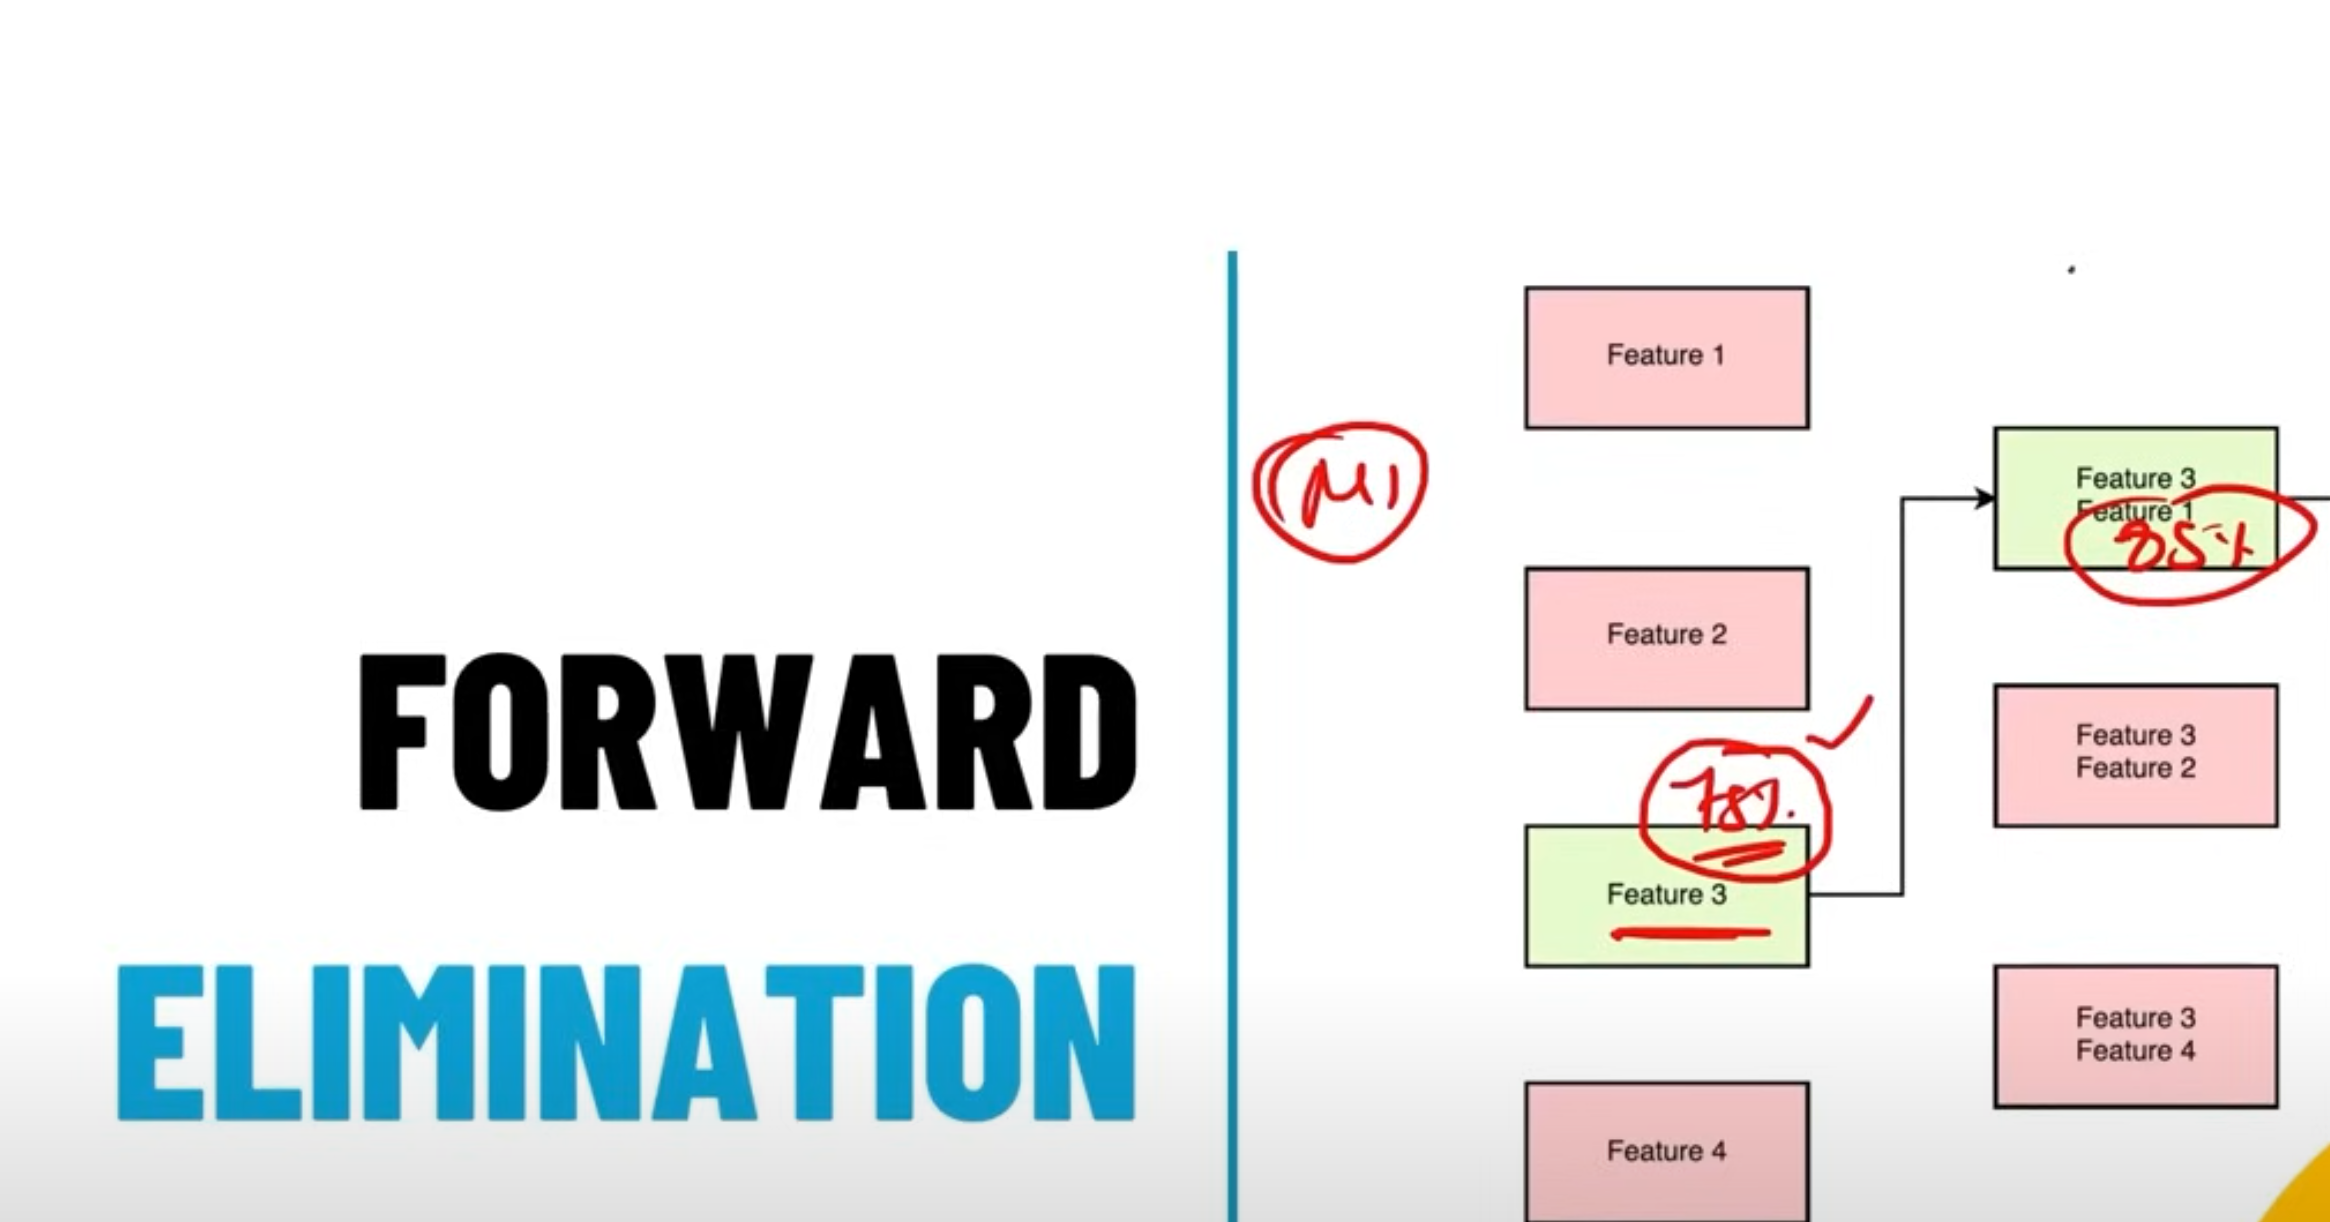

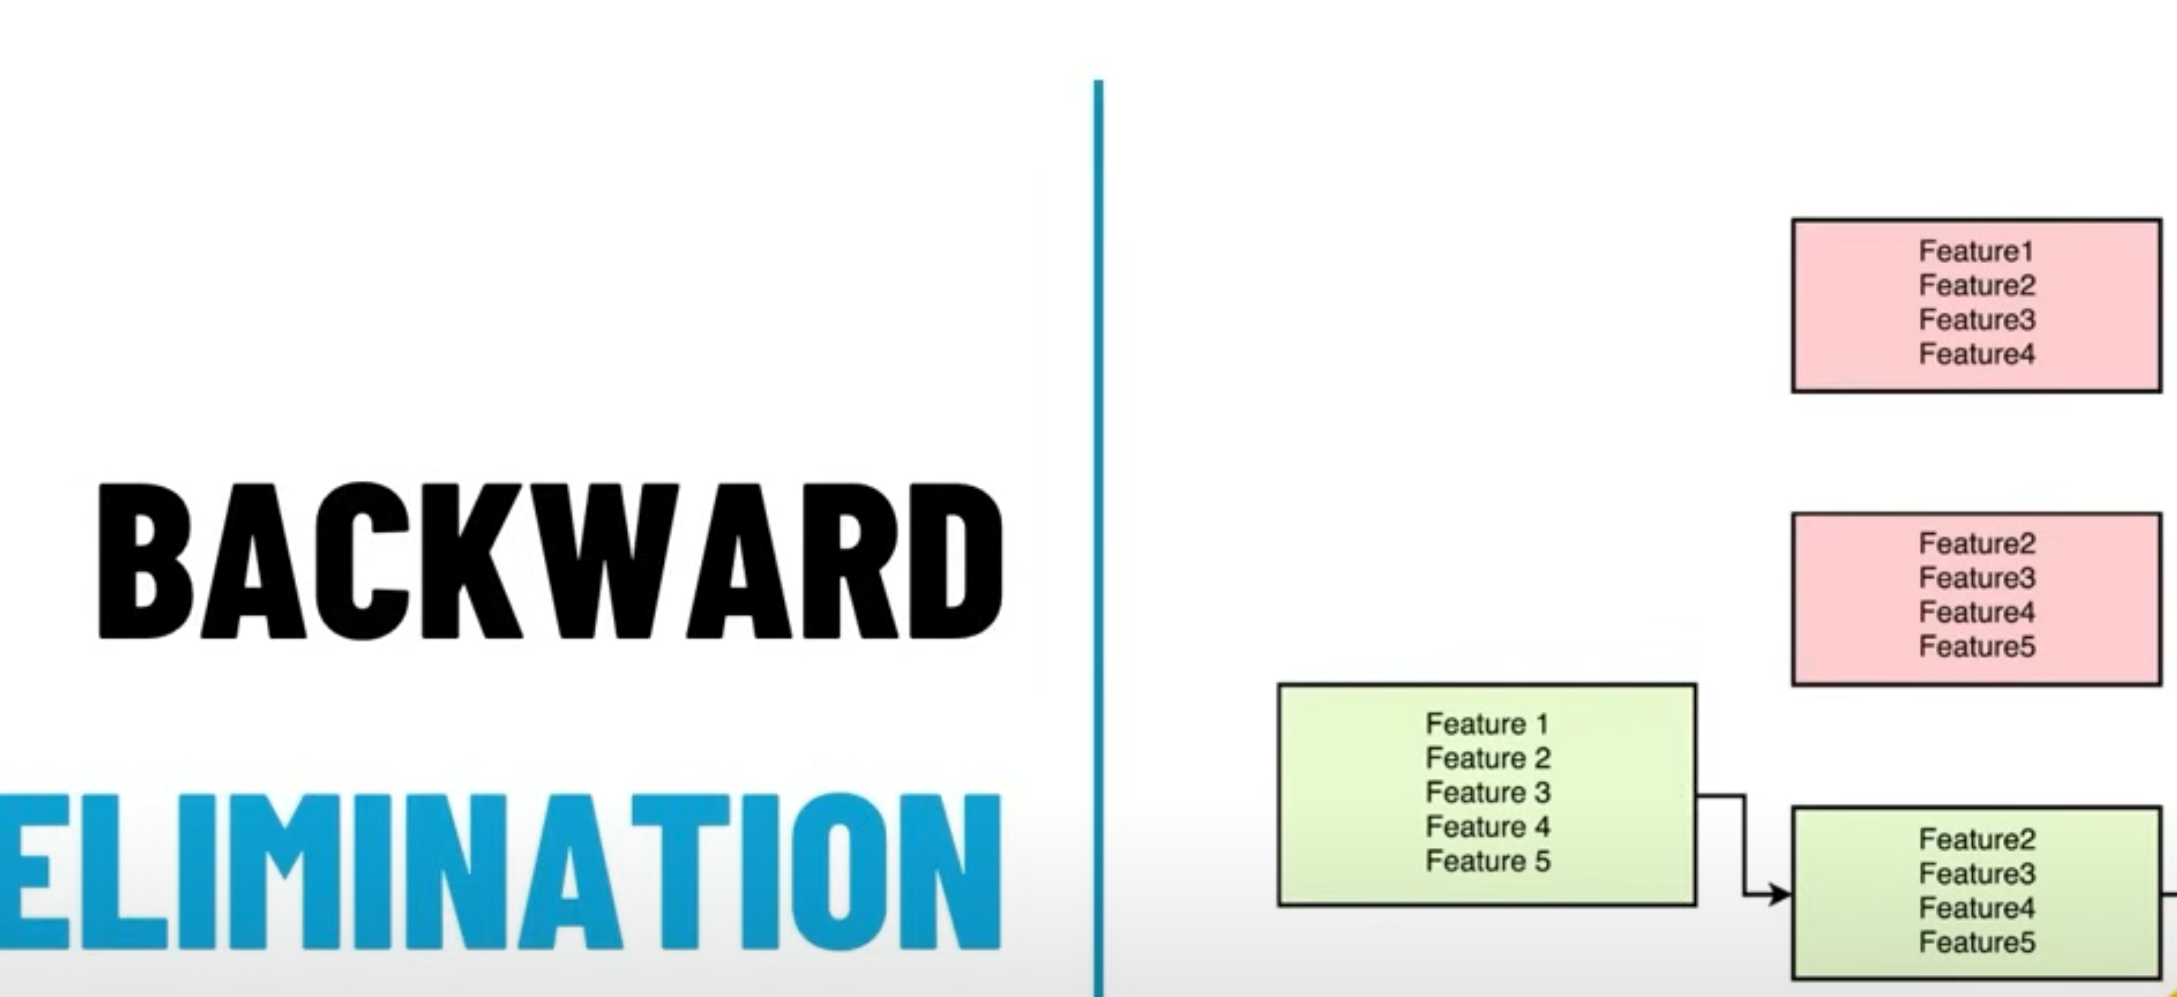

In [ ]:
pip install mlxtend


In [4]:
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector

In [21]:
# loading the data
ds = pd.read_excel("Financial Sample.xlsx")
ds.head(3)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,NaN,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,NaN,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,NaN,2178.0,3,15,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014


In [23]:
dataset = ds.select_dtypes(include=['int64', 'float64'])
dataset.head(3)

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Year
0,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,1,2014
1,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,1,2014
2,2178.0,3,15,32670.0,0.0,32670.0,21780.0,10890.0,6,2014


In [39]:
xs =  dataset.iloc[:,:-1]
ys = dataset["Units Sold"]
xs, ys

(     Units Sold  Manufacturing Price  Sale Price  Gross Sales  Discounts  \
 0        1618.5                    3          20      32370.0       0.00   
 1        1321.0                    3          20      26420.0       0.00   
 2        2178.0                    3          15      32670.0       0.00   
 3         888.0                    3          15      13320.0       0.00   
 4        2470.0                    3          15      37050.0       0.00   
 ..          ...                  ...         ...          ...        ...   
 695      2475.0                  260         300     742500.0  111375.00   
 696       546.0                  260         300     163800.0   24570.00   
 697      1368.0                    5           7       9576.0    1436.40   
 698       723.0                   10           7       5061.0     759.15   
 699      1806.0                  250          12      21672.0    3250.80   
 
          Sales      COGS    Profit  Month Number  
 0     32370.00   1618

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lr = LogisticRegression()

In [ ]:
fs = SequentialFeatureSelector(lr, k_features=9, forward=True)
fs.fit(xs,ys)
fs.k_score_

In [42]:
# working with the new dataset
from sklearn.datasets import load_iris

In [52]:
# Load dataset
data = load_iris()
x = data.data
y = data.target
x, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [65]:
# train model
sfs = SequentialFeatureSelector(lr, k_features=4, forward= True)
sfs.fit(x, y)

c:\Users\Jeetendra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(4, 4),
                          scoring='accuracy')

In [66]:
sfs.k_feature_names_

('0', '1', '2', '3')

In [67]:
# model trained now check the score
sfs.k_score_

np.float64(0.9733333333333334)